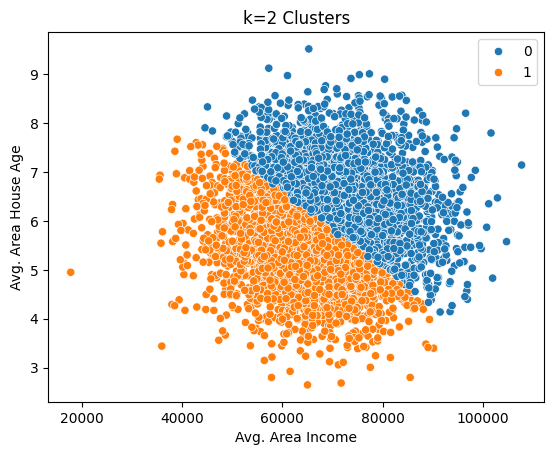

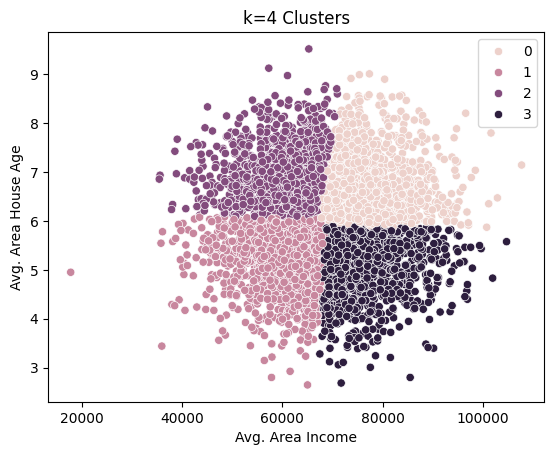

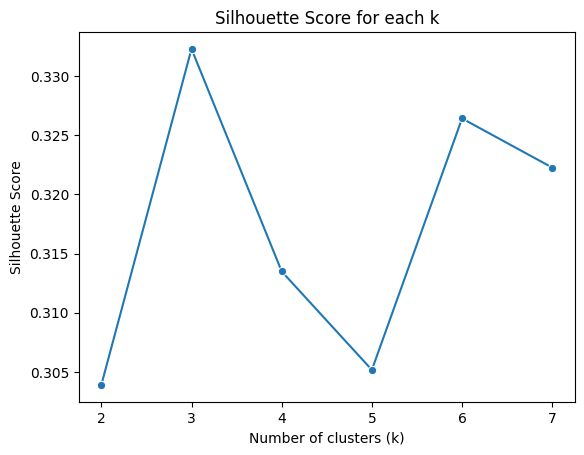

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load data
home_data = pd.read_csv('housing.csv')

# Select features for clustering
X = home_data[['Avg. Area Income', 'Avg. Area House Age']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Try different values of k
K = range(2, 8)
fits = []
scores = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_scaled)
    fits.append(model)
    scores.append(silhouette_score(X_scaled, model.labels_))

# Plot clusters for k=2 (index 0) and k=4 (index 2)
sns.scatterplot(x=X['Avg. Area Income'], y=X['Avg. Area House Age'], hue=fits[0].labels_)
plt.title('k=2 Clusters')
plt.show()

sns.scatterplot(x=X['Avg. Area Income'], y=X['Avg. Area House Age'], hue=fits[2].labels_)
plt.title('k=4 Clusters')
plt.show()

# Plot silhouette scores
sns.lineplot(x=K, y=scores, marker='o')
plt.title('Silhouette Score for each k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

